Install Libraries

In [53]:

import os
import matplotlib.pyplot as plt
import pandas as pd
import glob 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [54]:
%pip install vaderSentiment scikit-learn

Note: you may need to restart the kernel to use updated packages.


Read opinions from csv file 

In [55]:
opinions = pd.read_csv("./consolidated_opinions.csv", encoding='UTF-8')

In [56]:
opinions = opinions[["opinion", "score", "sentiment"]]

In [57]:
opinions.sentiment = opinions.sentiment.str.lower()

In [58]:
sa = SentimentIntensityAnalyzer()
opinions.vader = opinions.opinion.apply(lambda o: sa.polarity_scores(str(0)))

/var/folders/rj/8423s_v14k1ddpwzkb9zmtk40000gn/T/ipykernel_2655/3581178028.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  opinions.vader = opinions.opinion.apply(lambda o: sa.polarity_scores(str(0)))


In [59]:
# 1. Initialize the analyzer (if you haven't)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

# 2. CREATE the column properly using brackets
opinions['vader'] = opinions['opinion'].apply(lambda o: sa.polarity_scores(str(o)))

# 3. NOW run your concat and drop line
sentiment = pd.concat([opinions, opinions['vader'].apply(pd.Series)], axis=1).drop(columns=['vader'])

In [60]:


# 1. GET THE FILES
# Change this to your actual folder path. Keep the /*.csv at the end.
files = glob.glob("/Users/user/Desktop/uni/Sentimentanalysis/Opinions/*.csv")

# 2. READ AND MERGE
# This reads every file in the list and stacks them
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# 3. SAVE TO NEW FILE
df.to_csv("consolidated_opinions.csv", index=False)

print("Done! Saved as consolidated_opinions.csv")

Done! Saved as consolidated_opinions.csv


In [61]:
sentiment['vader_sentiment'] = sentiment.apply(
    lambda row: 'positive' if row['compound'] >= 0.05 else ('negative' if row['compound'] <= -0.05 else 'neutral'), axis=1)


In [62]:
misclassified = confusion_matrix(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels = ['positive', 'negative', 'neutral'])

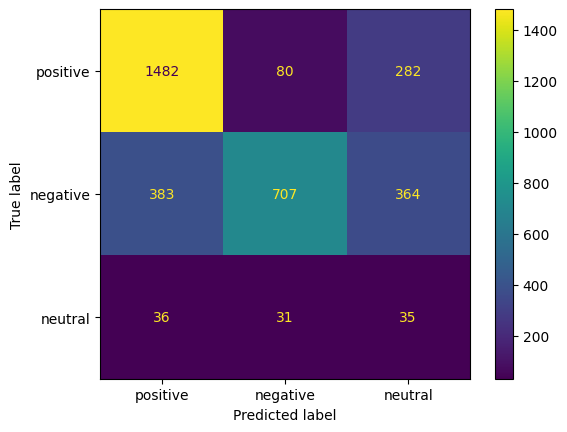

In [63]:
ConfusionMatrixDisplay(misclassified, display_labels=['positive', 'negative', 'neutral']).plot()

In [64]:
from sklearn.metrics import classification_report
raport = classification_report(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels=['positive', 'negative', 'neutral'], output_dict =True)

In [65]:
raport_df = pd.DataFrame(raport).transpose()

Save results

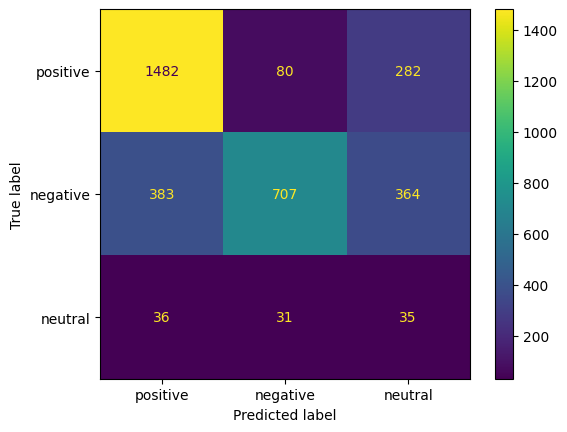

In [66]:
sentiment.to_csv("./sentiment_analysis_vader.csv", index=False, encoding='UTF-8')
raport_df.to_csv("./classification_report_vader.csv", index=True, encoding='UTF-8')
missclassified_df = pd.DataFrame(misclassified, index=['actual_positive', 'actual_negative', 'actual_neutral'], columns=['predicted_positive', 'predicted_negative', 'predicted_neutral']).to_csv("./confusion_matrix_vader.csv", index=True, encoding='UTF-8')

ConfusionMatrixDisplay(misclassified, display_labels=['positive', 'negative', 'neutral']).plot().figure_.savefig("./confusion_matrix_vader.png")